## False Nearest Neighbour Analysis
---

In order to conduct [Continuous RQA](rqaContinuous.ipynb) or [Categorical RQA](rqaCategorical.ipynb), we first need to determine how many dimensions best capture the dynamics in a measured behavioral time series. To do this, researchers use phase space reconstruction (PSR). Here, the time series is embedded within a phase space that is (re)constructed to be isomorphic, or at least similar, to the system’s real state space. To perform the reconstruction, two parameters are needed: the embedding dimension and the time lag.

#### Estimating the Time Lag

The first step of PSR is to determine the time delay or sample interval required to unfold the temporal structure of a system’s phase space trajectory. This is typically calculated using an average mutual information (AMI) analysis. See the [AMI](ami.ipynb) section of this tutorial for information on selecting the appropriate delay.

#### Estimating the Embedding Dimension

Once a time delay has been ascertained, we can then determine how many dimensions are needed to recover the system’s phase space (i.e., the embedding dimension). This can be determined using false nearest neighbors (FNN) analysis. FNN identifies the number of embedding dimensions needed to reconstruct a system’s phase space by calculating the percentage of false nearest neighbors (%FNN) for a given number of dimensions. False neighbors are states in phase space that erroneously appear near each other because too few dimensions have been used to observe the system’s dynamics. The %FNN represents the proportion of neighboring points that diverge and cease to be neighbors when another dimension is added. When all false nearest neighbors are eliminated (%FNN = 0), adding further dimensions does not provide additional information about the system’s dynamics. Therefore, the embedding dimension corresponds to the number of dimensions at which %FNN reaches zero.

#### Let's Practice FNN

Before we begin, we need to import and load various packages and utilities. These will allow us to import the data, manipulate it, run FNN, and create visualizations to explore our results.

The code below will do all the setup for you. Simply click the "play" button on the left to run the code, and we'll be ready to start our analysis. 

In [2]:
import os
import pandas as pd
from utils.fnn_utils import fnn, plot_fnn

Now that all the utilities are loaded, it's time to apply FNN to some real data. We'll use the same data as in [AMI](ami.ipynb) - positional data from an individual [swinging a pendulum](data/rqaContinuous/pendulums.txt). To run FNN, we need to input the delay (in this case, 15) into our FNN function.

Click the "play" button below to perform the analysis and generate the visualisations.

Loading file: pendulums.txt


Processing FNN: 100%|██████████| 10/10 [00:00<00:00, 11.60it/s]


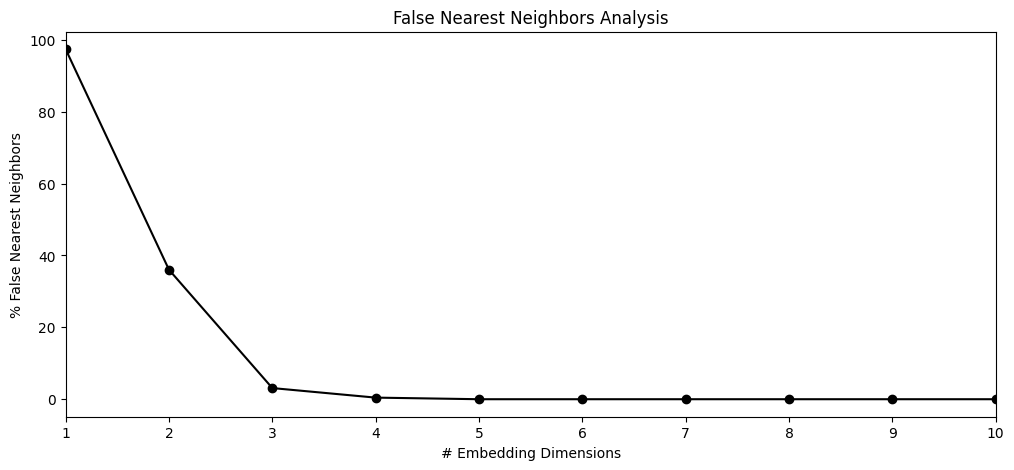

FNN and plotting completed successfully!


In [6]:
# First set the directory path for the data
data_directory = "data/crqaContinuous/"

# Then decide whether you'd like to save the plots 
# These are saved in "images/rqa"
save_image = True

# Set the file name for the data
file_name = "pendulums.txt"
file_path = os.path.join(data_directory, file_name)

# Check whether the file containing the data exists
if os.path.exists(file_path):
    print(f'Loading file: {file_name}')

    # Load the CSV file into a DataFrame
    data = pd.read_csv(file_path, header=None, sep='\t')

    # Select first column in data to analyse
    continuous_data = data.iloc[:, 0]

    # Compute FNN
    fnn_ds, fnn_percent = fnn(continuous_data, 15, 1, 10)

    # Plot FNN
    plot_fnn(fnn_ds, fnn_percent)

    print('FNN and plotting completed successfully!')
else:
    print(f'File {file_name} not found in directory {data_directory}')


#### Interpreting the Results

If your code ran successfully, you should see a graph in which %FNN = 0 around 3 dimensions. This number would therefore be taken as our embedding dimension.

#### Periodic vs. Other Data Types

Importantly, time series that exhibit aperiodic or stochastic patterns may never return %FNN = 0. In these cases, the best practice is to select the dimension at which the %FNN levels out or first approaches a value close to zero. Let's look at a different time series: [acceleration data](data/rqaContinuous/walkerAfriend.txt) from a person walking. This data is also used in the [AMI](ami.ipynb) and [Continuous RQA](rqaContinuous.ipynb) sections. 

Click the "play" button below to perform the analysis and generate the visualisations.

Loading file: walkersABfriend.txt


Processing FNN: 100%|██████████| 10/10 [00:03<00:00,  2.69it/s]


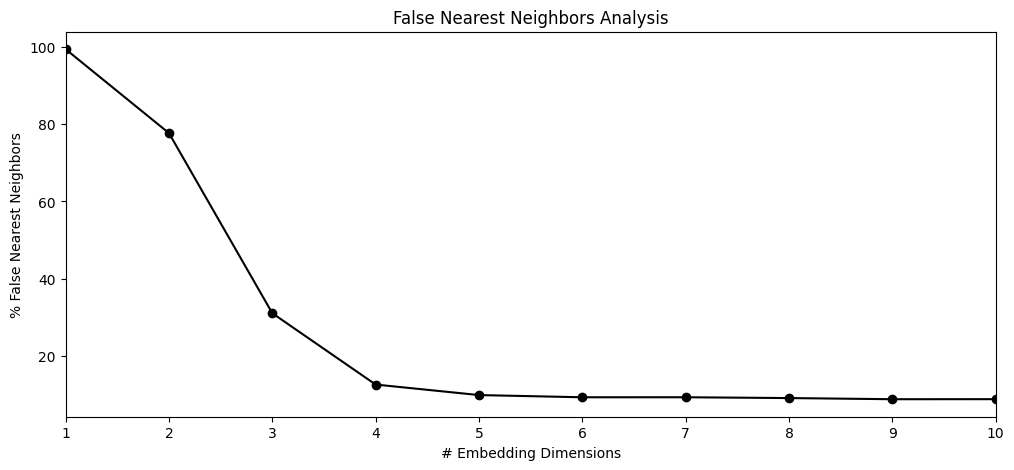

FNN and plotting completed successfully!


In [5]:
# First set the directory path for the data
data_directory = "data/crqaContinuous/"

# Then decide whether you'd like to save the plots 
# These are saved in "images/rqa"
save_image = True

# Set the file name for the data
file_name = "walkersABfriend.txt"
file_path = os.path.join(data_directory, file_name)

# Check whether the file containing the data exists
if os.path.exists(file_path):
    print(f'Loading file: {file_name}')

    # Load the CSV file into a DataFrame
    data = pd.read_csv(file_path, header=None, sep='\t')

    # Select first column in data to analyse
    continuous_data = data.iloc[:, 0]

    # Compute FNN
    fnn_ds, fnn_percent = fnn(continuous_data, 15, 1, 10)

    # Plot FNN
    plot_fnn(fnn_ds, fnn_percent)

    print('FNN and plotting completed successfully!')
else:
    print(f'File {file_name} not found in directory {data_directory}')


It looks as though this graph levels out around 4.

#### Going Further

Once you have selected an appropriate [delay](ami.ipynb) and [embedding dimension](fnn.ipynb), it's time to run continuous RQA! Head to [Continuous RQA](rqaContinuous.ipynb) and [Continuous CRQA](crqaContinuous.ipynb) to learn how to conduct these analyses. 